In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data=sns.load_dataset("iris")


In [17]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data.shape

(150, 5)

In [12]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data[['SepalLengthCm','SepalWidthCm']].describe()

KeyError: "None of [Index(['SepalLengthCm', 'SepalWidthCm'], dtype='object')] are in the [columns]"

In [14]:
data['Species'].unique()

KeyError: 'Species'

In [15]:
len(data.iloc[:,5:])

150

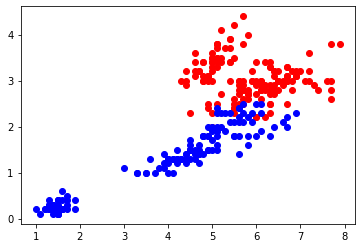

In [12]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],color='red')
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],color='blue')
plt.show()

In [13]:
petalLXpetalW=data.iloc[:,3:4].values*data.iloc[:,4:5].values
petalLXpetalW
data['PetalLXPetalW']=petalLXpetalW
sepalLXsepalW=data['SepalLengthCm'].values*data['SepalWidthCm'].values
data['SepalLXSepalW']=sepalLXsepalW

In [14]:
data['SepalLengthCm']=np.log(data['SepalLengthCm'].values)
data['SepalWidthCm']=np.log(data['SepalWidthCm'].values)
data['PetalLengthCm']=np.log(data['PetalLengthCm'].values)
data['PetalWidthCm']=np.log(data['SepalWidthCm'].values)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],color='r')
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],color='b')
plt.show()

In [ ]:
data1=data.iloc[:,1:5]
data2=data.iloc[:,5:6]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data2=le.fit_transform(data2)
data3=data.iloc[:,6:]
new_data=pd.concat([data1],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_data,data2,test_size=0.33,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
knn.score(x_test,y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_data=sc.fit_transform(new_data)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new_data,data2,test_size=0.33,random_state=0)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier()
rnd.fit(x_train,y_train)

In [ ]:
y_pred=rnd.predict(x_test)

In [ ]:
rnd.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [ ]:
dtc.score(x_test,y_test)

In [ ]:
cm=confusion_matrix(y_pred,y_test)
cm